## Analysing Telecom churn data using machine learning and python
- Customer churn is a key business concept that determines the number of customers that stop doing business with a specific company.
- With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.
## Step - 1: Importing and Merging Data 

In [2]:
# First import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing customer data set
cust_data = pd.read_csv('/Users/sakshimunde/Downloads/customer_data.csv')
cust_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
# seeing shape of the customer data
cust_data.shape

(7043, 5)

7043 rows ans 5 columns

In [6]:
# importing internet data
internet_data = pd.read_csv('/Users/sakshimunde/Downloads/internet_data.csv')
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [7]:
# seeing the shape of internt_data
internet_data.shape

(7043, 9)

In [8]:
# importing churn_data
churn_data = pd.read_csv('/Users/sakshimunde/Downloads/churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# see dimensions of churn_data
churn_data.shape

(7043, 9)

#### Merging all data files

In [10]:
# merging cust and internet data on customer id 
df = pd.merge(cust_data,internet_data,how='inner',on = 'customerID')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [11]:
# merging  df & churn data
telecom = pd.merge(df,churn_data,how = 'inner' ,on ='customerID')

pd.set_option('display.max_columns',None)    # this will show all columns of a dataset


# Step 2 :Inspecting the dataframe

In [12]:
# lets see the final dataframe with all predictor vars
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# Let's look at columns ,their types & non null count 
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- total charges should be a numeric column.
- There are many columns that needed to be converted to a category type.
- We can see no null values are there in the data.
- Customer Id is not useful so we will drop it.

In [14]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
# let's look at unique values of all category column
print("\n1.Partner")
print(telecom.Partner.unique())

print("\n2.Dependents")
print(telecom.Dependents.unique())

print("\n3.OnlineSecurity")
print(telecom.OnlineSecurity.unique())

print("\n4.OnlineBackup")
print(telecom.OnlineBackup.value_counts())



1.Partner
['Yes' 'No']

2.Dependents
['No' 'Yes']

3.OnlineSecurity
['No' 'Yes' 'No internet service']

4.OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


In [16]:
print("\n1.DeviceProtection")
print(telecom.DeviceProtection.value_counts())

print('\n2.TechSupport')
print(telecom.TechSupport.value_counts())

print('\n3.StreamingTV')
print(telecom.StreamingTV.unique())

print('\n4.PhoneService')
print(telecom.PhoneService.unique())

print('\n5.PaperlessBilling')
print(telecom.PaperlessBilling.value_counts())

print('\n6.Churn')
print(telecom.Churn.value_counts())


1.DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

2.TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

3.StreamingTV
['No' 'Yes' 'No internet service']

4.PhoneService
['No' 'Yes']

5.PaperlessBilling
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

6.Churn
No     5174
Yes    1869
Name: Churn, dtype: int64


- The count of the level ‘No internet service’ is the same for all, i.e. 1526. Can you explain briefly why this has happened?

This happens because the level ‘No internet service’ just tells you whether a user has internet service or not. Now because the number of users not having an internet service is the same, the count of this level in all of these variables will be the same. You can also check the value counts of the variable ‘InternetService’ and you’ll see that the output you’ll get is:

Fiber Optic    3096
DSL                   2421
No                      1526

Coincidence? No! 
This information is already contained in the variable ‘InternetService’ and hence, the count will be the same in all the variables with the level ‘No internet service’. This is actually also the reason we chose to drop this particular level.
- --------
- we can see Partner, dependents , PhoneService,PaperlessBilling & Churn are binary data(yes/no) lets convert them to 0 and 1.

Step 3: Data Preparation
--
- Converting binary variables yes/no to 0/1


In [17]:
# list of vars to map
binary_var = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

# applying the map function to hte list
telecom[binary_var] = telecom[binary_var].apply(lambda x : x.map({'Yes':1,'No':0}))


In [18]:
# let's lokk at the data
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,1,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,34,1,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,2,1,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,2,1,Month-to-month,1,Electronic check,70.70,151.65,1


- We can see yes & no got converted to 1's and 0's
- Now let's convert categorical vars with >2 levels to dummy vars

In [19]:
# first we will convert gender,InternetService,Contract,PaymentMethod categorical vars to dummies

dummy1 = pd.get_dummies(telecom[['gender','InternetService','Contract','PaymentMethod']] , drop_first=True)
dummy1.head()

,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0
4,0,1,0,0,0,0,1,0


In [20]:
# let's now concat dummy vars dataframe with telecom dataframe
telecom = pd.concat([telecom,dummy1],axis=1)
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,34,1,One year,0,Mailed check,56.95,1889.5,0,1,0,0,1,0,0,0,1
2,3668-QPYBK,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,0,0,0,1
3,7795-CFOCW,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,1,0,0,0,0
4,9237-HQITU,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0,0,0,0,1,0


In [21]:
# Now creating dummy vars of rest all categoriacl vars
print(telecom.MultipleLines.unique())


['No phone service' 'No' 'Yes']


In [22]:
# let's convert categorical vars to dummies

ML = pd.get_dummies(telecom['MultipleLines'] , prefix = 'MultipleLines')
ML.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [23]:
# let's drop MultipleLines_No phone service as it is not useful aswell
# for n levels we should have n-1 levels.
ML1 = ML.drop(['MultipleLines_No phone service'], axis=1)

In [24]:
ML1.head()

,MultipleLines_No,MultipleLines_Yes
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


- We can keep n levels but aanyhow it would be redundant to keep extra columns.
- OnlineSecurity,OnlineBackup,DeviceProtection,techsupport,StreamingTV,Streaming movies are categorical vars that are left which needed to be converted to dummy vars.

In [25]:
# Converting OnlineSecurity to dummy var
OS = pd.get_dummies(telecom['OnlineSecurity'] ,prefix = 'OnlineSecurity')
OS.head()

,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [26]:
# dropping OnlineSecurity No internet service column bcz there are n levels we should have n-1 levels 
OS1 = OS.drop(['OnlineSecurity_No internet service'] ,axis=1)
OS1.head()

,OnlineSecurity_No,OnlineSecurity_Yes
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [27]:
# OnlineBackup
OB = pd.get_dummies(telecom['OnlineBackup'] ,prefix = 'OnlineBackup')
OB.head()

,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [28]:
# drop OnlineBackup_No internet service	
OB = OB.drop(['OnlineBackup_No internet service'] , axis=1)
OB.head()

,OnlineBackup_No,OnlineBackup_Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [29]:
# DeviceProtection
DP = pd.get_dummies(telecom['DeviceProtection'] ,prefix = 'DeviceProtection')
DP.head()

,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [30]:
# drop DeviceProtection_No internet service
DP = DP.drop(['DeviceProtection_No internet service'] ,axis=1)
DP.head()

,DeviceProtection_No,DeviceProtection_Yes
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [31]:
# TechSupport
TS = pd.get_dummies(telecom['TechSupport'] ,prefix = 'TechSupport')
TS.head()

,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


In [32]:
# drop TechSupport_No internet service
TS = TS.drop(['TechSupport_No internet service'] , axis =1)
TS.head()

,TechSupport_No,TechSupport_Yes
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [33]:
# StreamingTV
ST = pd.get_dummies(telecom['StreamingTV'] ,prefix='StreamingTV')
ST.head()

,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [34]:
# drop StreamingTV_No internet service
ST = ST.drop(['StreamingTV_No internet service'] ,axis=1)
ST.head()

,StreamingTV_No,StreamingTV_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [35]:
# StreamingMovies
SM = pd.get_dummies(telecom['StreamingMovies'] ,prefix = 'StreamingMovies')
SM.head()

,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [36]:
# DROPPING STREAMING MOVIES NO INTERNET SERVICE 
SM = SM.drop(['StreamingMovies_No internet service'] , axis=1)
SM.head()

,StreamingMovies_No,StreamingMovies_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [37]:
# CONCATINATING ALL DUMMIES WITH TELECOM DATAFRAME 
telecom = pd.concat([telecom,ML1] , axis=1)
telecom = pd.concat([telecom,OS1] , axis=1)
telecom = pd.concat([telecom,OB] , axis=1)
telecom = pd.concat([telecom,DP] , axis=1)
telecom = pd.concat([telecom ,TS] , axis=1)
telecom = pd.concat([telecom,ST] , axis=1)
telecom = pd.concat([telecom,SM] , axis=1)
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,34,1,One year,0,Mailed check,56.95,1889.5,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


###### Drop repeated vars
- We have created dumy vars so we can drop repeated var

In [38]:
# We have created dummies for the below vars,so we can drop them
telecom = telecom.drop(['gender','InternetService','Contract','PaymentMethod','MultipleLines','OnlineSecurity',
    'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'] , axis=1)
telecom.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.5,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [39]:
# Customer id is not useful column so let's drop it
telecom = telecom.drop(['customerID'],axis=1)

In [40]:
# THERE IS A BLANK SPACE IN TOTALCHARGES COLUMN BCZ OF WHICH IT IS SHOWING AS AN OBJECT
telecom['TotalCharges'] = telecom['TotalCharges'].str.replace(' ','0')
telecom['TotalCharges'] = telecom['TotalCharges'].astype(float)
telecom['TotalCharges'].shape

(7043,)

In [41]:
# Seeing the data type 
telecom['TotalCharges'].dtype

dtype('float64')

In [42]:
# checking whether there are null values or not
telecom.isnull().sum()

SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBackup_Yes                         0
DeviceProte

In [43]:
# seeing data types of all variables
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   gender_Male                            7043 non-null   uint8  
 10  InternetService_Fiber optic            7043 non-null   uint8  
 11  Inte

In [44]:
telecom.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,0,0,0,2,1,1,70.70,151.65,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


##### Checking for outliers 
- SeniorCitizen,tenure ,MonthlyCharges,TotalCharges are numerical data  with high values.So we will see whether outliers are present in them or not

In [45]:
# Checking for outliers in continuous variables
numerical_val = telecom[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]
numerical_val.describe(percentiles =[ 0.25,0.50,0.75,0.90,0.95,0.99])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
90%,1.000000,69.000000,102.600000,5973.690000
95%,1.000000,72.000000,107.400000,6921.025000
99%,1.000000,72.000000,114.729000,8039.256000


- We can see there are no outliers. All values are increasing gradually.

# Step 4 : Splitting data into train and test sets

In [46]:
# assigning all feature vars to X 
# Splitting data to features and target.
X = telecom.drop(['Churn'],axis=1)
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,0,0,0,2,1,1,70.70,151.65,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [47]:
# assigning churn(target) variable to y axis 
y = telecom['Churn']

In [48]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [49]:
# import train test split library
from sklearn.model_selection import train_test_split

In [50]:
# splitting data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y , train_size=0.7 ,test_size =0.30,random_state =100)

In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4930, 30)
(4930,)
(2113, 30)
(2113,)


## Step 5 : Feature Scaling
- Scaling helps us in faster convergence of gradient descent.
- Standard scaler centers mean to 0 
     - The formula for standardising a value in a dataset is given by:
     - (X − μ)/σ

- Min max scaling compress values between min 0 and max 1 
--------
- We do 'fit_transform' on the train set but just 'transform' on the test set. Why do you think this is done 
- We don't want the variables to learn anything new ,so we don't fit the test data set. 
     - if we apply fit to test data then mean 0 and std 1 will be diff of train and test data we should have same mean and std for train and test.That's why we don't do fit to test dataset.If we do then both will get diff mean & std.

In [52]:
# We will use standard scaler to scale all large values
from sklearn.preprocessing import StandardScaler

In [53]:
# creating an object of standard scaler as in sklearn we create an object of a class
scaler = StandardScaler()

In [54]:
# fit and transform the numerical columns
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure',
                    'MonthlyCharges','TotalCharges']])
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
877,0,0,1,0.754422,0,0,-0.145568,0.350963,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1
5792,1,0,0,-0.710751,1,1,1.051796,-0.377957,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1
5334,0,1,1,0.673024,1,1,1.437668,1.329866,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
878,0,0,0,1.120716,1,0,0.006794,0.776103,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
6578,0,0,1,-0.914247,1,0,0.298268,-0.701925,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1



- The variables had these ranges before standardisation:
    - Tenure = 1 to 72
    - Monthly charges = 18.25 to 118.80
    - Total charges = 18.8 to 8685
 
- After standardisation, the ranges of the variables changed to:
  - Tenure = -1.28 to +1.61
  - Monthly charges = -1.55 to +1.79
  - Total charges = -0.99 to 2.83
- Clearly, none of the variables will have a disproportionate effect on the model’s results now.

churn data
--
let's see what is the percentage of churn data

In [55]:
# churn % rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.536987079369588

- We have 27% churn rate.
## step 6 : Looking at Correlations
- Let's see the correlation between the variables.

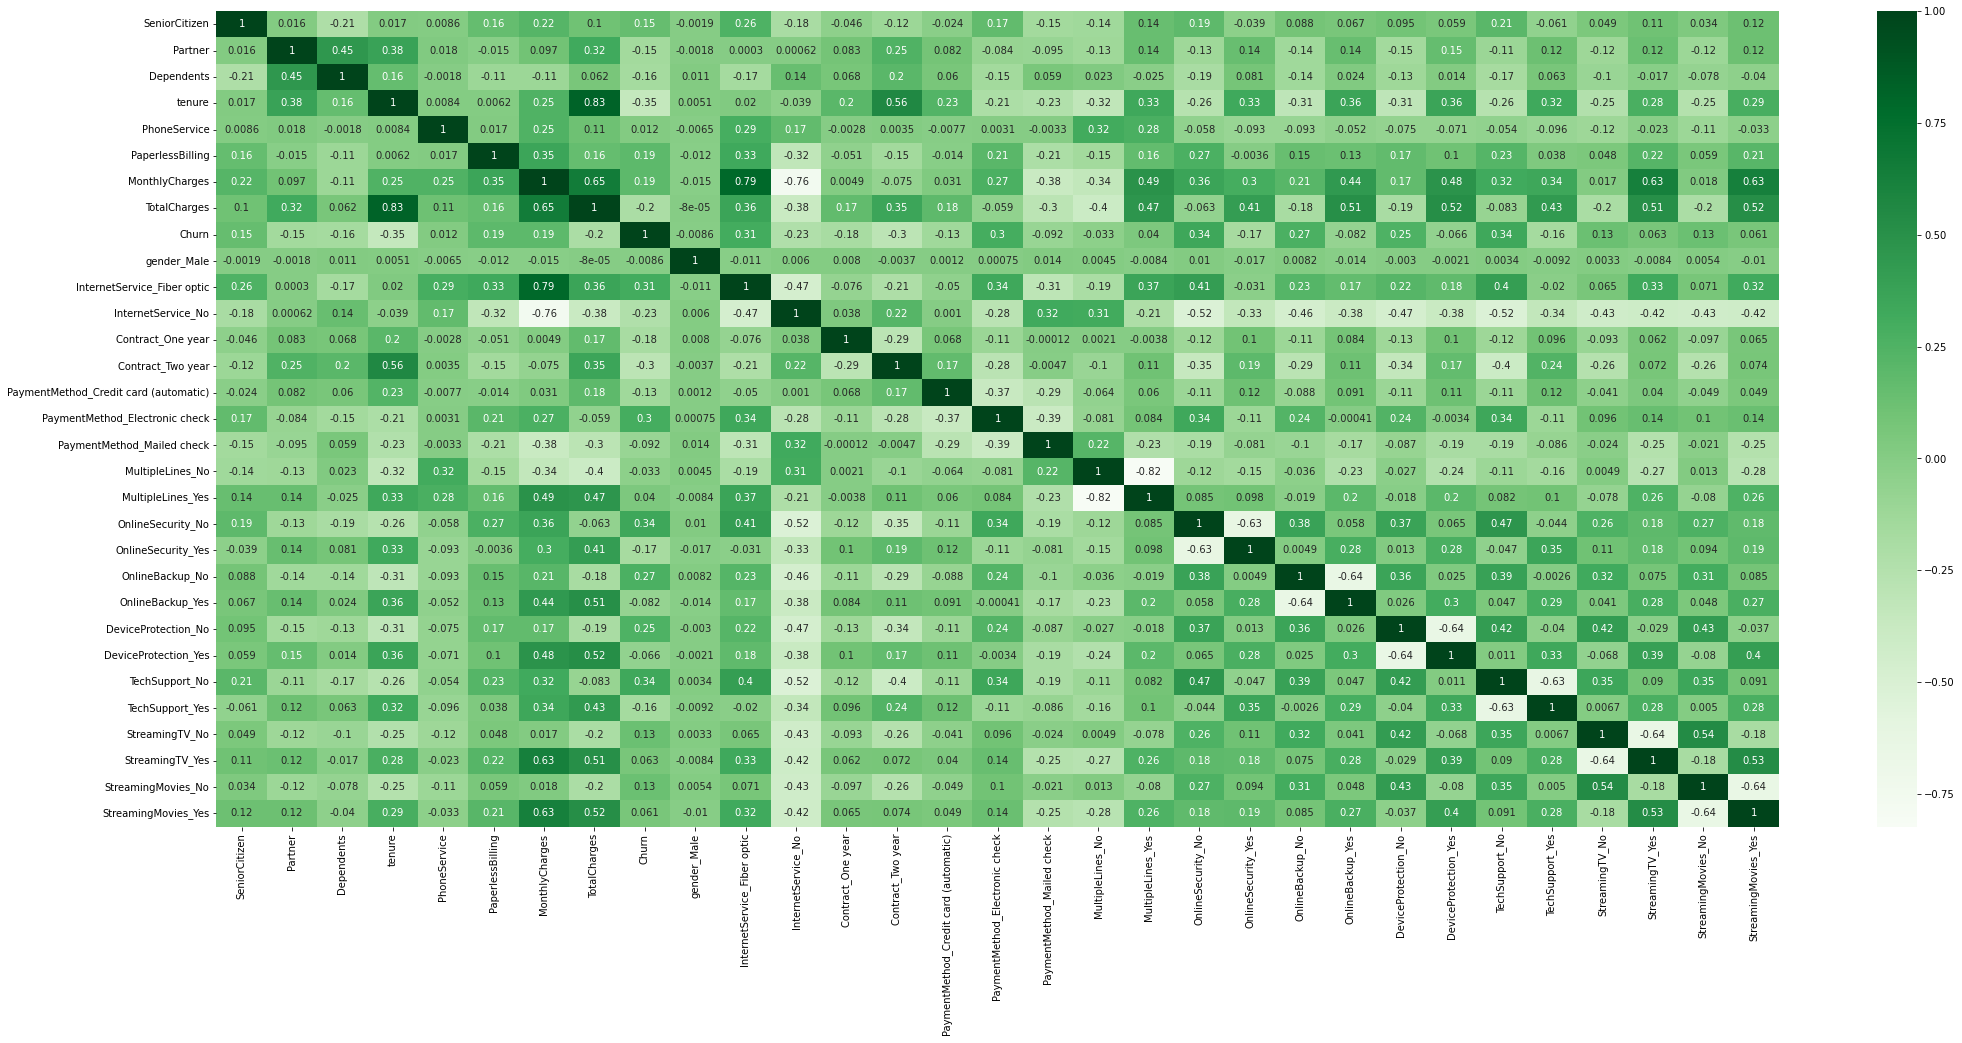

In [56]:
# plotting correlation matrix to see the relationship
plt.figure(figsize=[35,15])
sns.heatmap(telecom.corr(),annot=True,cmap = "Greens")
plt.show()

- We can see the correlations between these dummy variables with their complimentary dummy variables, i.e. ‘MultipleLines_No’ with ‘MultipleLines_Yes’ or ‘OnlineSecurity_No’ with ‘OnlineSecurity_Yes’, are highly correlated.

- So it is better that we drop one of these variables from each pair as they won’t add much value to the model. 

- The choice of which of these pair of variables we desire to drop is completely up to us; we’ve chosen to drop all the 'Nos' because the 'Yeses' are generally more interpretable and easy-to-work-with variables.

- Let's drop this inter correlated vars: also called multicollinearity. 

In [57]:
# dropping the variables from both traain and test data sets
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',
                        'TechSupport_No','StreamingTV_No','StreamingMovies_No'],axis=1)
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',
                        'TechSupport_No','StreamingTV_No','StreamingMovies_No'],axis=1)

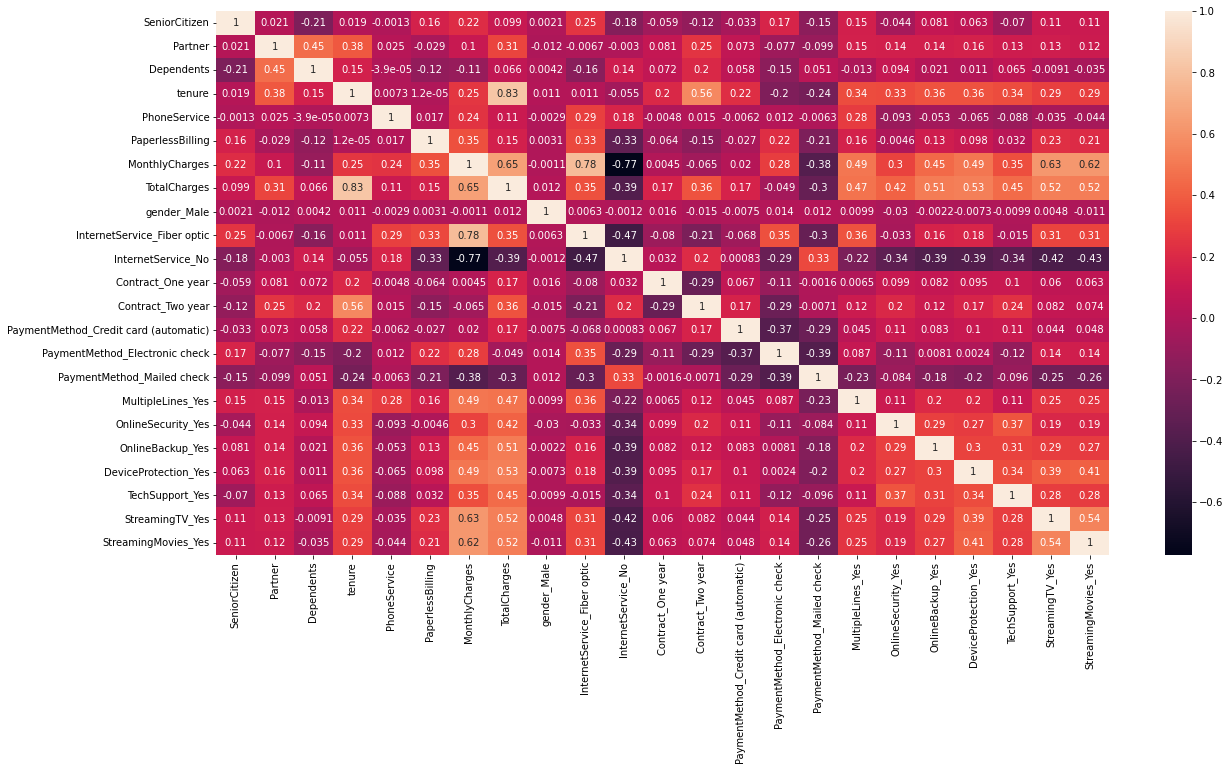

In [58]:
# Now after dropping some of the dummy vars ,let's see the relation between rest of the vars
plt.figure(figsize=[20,10])
sns.heatmap(X_train.corr(),annot=True)
plt.show()

# Step 7 : Model Building
- Now that we have completed all the pre-processing steps, inspected the correlation values and have eliminated a few variables, it’s time to build our first model. 

In [59]:
# import statsmodel 
import statsmodels.api as sm

In [60]:
# first add a constant, as stats take intercept from origin by default
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
877,1.0,0,0,1,0.754422,0,0,-0.145568,0.350963,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1
5792,1.0,1,0,0,-0.710751,1,1,1.051796,-0.377957,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1
5334,1.0,0,1,1,0.673024,1,1,1.437668,1.329866,0,1,0,0,1,0,0,0,1,0,1,1,1,1,1
878,1.0,0,0,0,1.120716,1,0,0.006794,0.776103,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0
6578,1.0,0,0,1,-0.914247,1,0,0.298268,-0.701925,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1


In [61]:
# BUilding logistic regression model 
logm1 = sm.GLM(y_train,X_train_sm , family= sm.families.Binomial()).fit()
logm1

In [62]:
# now our model is built.Let's see summary
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.0
Date:                Fri, 03 Mar 2023   Deviance:                       4016.1
Time:                        13:57:49   Pearson chi2:                 5.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2885
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.9889      1.532     -1.952      0.051      -5.991       0.013
SeniorCitizen                             0.2950      0.103      2.877      0.004       0.094       0.496
Partner                                   0.0272      0.094      0.289      0.772      -0.157       0.212
Dependents                               -0.2207      0.108     -2.049      0.040      -0.432      -0.010
tenure                                   -1.3441      0.179     -7.500      0.000      -1.695      -0.993
PhoneService                              0.4097      0.786      0.521      0.602      -1.131       1.950
PaperlessBilling                          0.3453      0.090      3.828      0.000       0.169       0.522
MonthlyCharges                           -1.5336      1.162     -1.320      0.187      -3.812       0.744
TotalCharges                              0.6103      0.190      3.215      0.001       0.238       0.982
gender_Male                              -0.0411      0.078     -0.525      0.600      -0.195       0.112
InternetService_Fiber optic               2.0221      0.967      2.091      0.037       0.127       3.917
InternetService_No                       -2.1794      0.977     -2.231      0.026      -4.094      -0.264
Contract_One year                        -0.6736      0.129     -5.205      0.000      -0.927      -0.420
Contract_Two year                        -1.3372      0.207     -6.452      0.000      -1.743      -0.931
PaymentMethod_Credit card (automatic)    -0.1531      0.138     -1.108      0.268      -0.424       0.118
PaymentMethod_Electronic check            0.2733      0.114      2.396      0.017       0.050       0.497
PaymentMethod_Mailed check               -0.0916      0.139     -0.660      0.509      -0.364       0.180
MultipleLines_Yes                         0.5539      0.215      2.577      0.010       0.133       0.975
OnlineSecurity_Yes                       -0.0429      0.217     -0.198      0.843      -0.467       0.382
OnlineBackup_Yes                         -0.0206      0.211     -0.097      0.922      -0.435       0.394
DeviceProtection_Yes                      0.2014      0.213      0.944      0.345      -0.217       0.620
TechSupport_Yes                          -0.2538      0.219     -1.159      0.247      -0.683       0.175
StreamingTV_Yes                           0.7001      0.397      1.764      0.078      -0.078       1.478
StreamingMovies_Yes                       0.6689      0.396      1.688      0.091      -0.108       1.445
=========================================================================================================
"""

- Based on the summary statistics, we infer that many of the variables are insignificant and hence, we need to do some feature elimination.
- Since the number of features are huge, let's first start with an automated feature selection technique (RFE) and then move on to manual feature elimination (using p-values and VIFs). 
## Step 8: Feature selection using RFE

In [63]:
# import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor

LogisticRegression()

In [64]:
# now import RFE 
from sklearn.feature_selection import RFE

In [65]:
# now select number of top vars we want.

rfe = RFE(lor, n_features_to_select = 15)   # running RFE with 15 vars as output
rfe = rfe.fit(X_train ,y_train)
rfe

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [66]:
# let's see the top 15 columns
list(zip(X_train.columns ,rfe.ranking_))

[('SeniorCitizen', 1),
 ('Partner', 9),
 ('Dependents', 2),
 ('tenure', 1),
 ('PhoneService', 1),
 ('PaperlessBilling', 1),
 ('MonthlyCharges', 8),
 ('TotalCharges', 1),
 ('gender_Male', 7),
 ('InternetService_Fiber optic', 1),
 ('InternetService_No', 1),
 ('Contract_One year', 1),
 ('Contract_Two year', 1),
 ('PaymentMethod_Credit card (automatic)', 4),
 ('PaymentMethod_Electronic check', 1),
 ('PaymentMethod_Mailed check', 5),
 ('MultipleLines_Yes', 1),
 ('OnlineSecurity_Yes', 1),
 ('OnlineBackup_Yes', 1),
 ('DeviceProtection_Yes', 6),
 ('TechSupport_Yes', 1),
 ('StreamingTV_Yes', 1),
 ('StreamingMovies_Yes', 3)]

In [67]:
# let's keep selected columns in 'col' var
col = X_train.columns[rfe.support_]
col

Index(['SeniorCitizen', 'tenure', 'PhoneService', 'PaperlessBilling',
       'TotalCharges', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MultipleLines_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes'],
      dtype='object')

- Out of this also we can have insignificant features.So let's see which features are insignificant.
##### Creating the model using statsmodel

In [68]:
# now that we have top 15 columns.We will build a model using this vars
# assign top 15 columns to X train
X_train_rfe = X_train[col]
X_train_rfe.head()

,SeniorCitizen,tenure,PhoneService,PaperlessBilling,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes
877,0,0.754422,0,0,0.350963,0,0,1,0,0,0,1,0,1,1
5792,1,-0.710751,1,1,-0.377957,1,0,0,0,0,0,1,0,1,0
5334,0,0.673024,1,1,1.329866,1,0,0,1,0,1,0,1,1,1
878,0,1.120716,1,0,0.776103,0,0,1,0,1,1,1,0,1,0
6578,0,-0.914247,1,0,-0.701925,0,0,1,0,0,1,1,0,1,0


In [69]:
# now let's add constant to train data
X_train_sm = sm.add_constant(X_train_rfe)
X_train_sm.head()

,const,SeniorCitizen,tenure,PhoneService,PaperlessBilling,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes
877,1.0,0,0.754422,0,0,0.350963,0,0,1,0,0,0,1,0,1,1
5792,1.0,1,-0.710751,1,1,-0.377957,1,0,0,0,0,0,1,0,1,0
5334,1.0,0,0.673024,1,1,1.329866,1,0,0,1,0,1,0,1,1,1
878,1.0,0,1.120716,1,0,0.776103,0,0,1,0,1,1,1,0,1,0
6578,1.0,0,-0.914247,1,0,-0.701925,0,0,1,0,0,1,1,0,1,0


In [70]:
#let's build our 2nd model after RFE 
logm2 = sm.GLM(y_train , X_train_sm , family = sm.families.Binomial()).fit()
logm2     

In [71]:
# let's see summary
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4914
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2013.5
Date:                Fri, 03 Mar 2023   Deviance:                       4027.0
Time:                        13:57:53   Pearson chi2:                 5.86e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2869
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0907      0.170     -6.405      0.000      -1.424      -0.757
SeniorCitizen                      0.3323      0.100      3.307      0.001       0.135       0.529
tenure                            -1.3766      0.174     -7.919      0.000      -1.717      -1.036
PhoneService                      -0.6310      0.158     -3.989      0.000      -0.941      -0.321
PaperlessBilling                   0.3610      0.090      4.020      0.000       0.185       0.537
TotalCharges                       0.6560      0.182      3.604      0.000       0.299       1.013
InternetService_Fiber optic        0.7711      0.119      6.495      0.000       0.538       1.004
InternetService_No                -0.9344      0.164     -5.714      0.000      -1.255      -0.614
Contract_One year                 -0.6847      0.128     -5.335      0.000      -0.936      -0.433
Contract_Two year                 -1.3542      0.206     -6.564      0.000      -1.759      -0.950
PaymentMethod_Electronic check     0.3638      0.083      4.365      0.000       0.200       0.527
MultipleLines_Yes                  0.3001      0.096      3.130      0.002       0.112       0.488
OnlineSecurity_Yes                -0.3070      0.102     -3.018      0.003      -0.506      -0.108
OnlineBackup_Yes                  -0.2801      0.093     -3.015      0.003      -0.462      -0.098
TechSupport_Yes                   -0.5067      0.104     -4.877      0.000      -0.710      -0.303
StreamingTV_Yes                    0.2265      0.095      2.386      0.017       0.040       0.412
==================================================================================================
"""

- We can see all p values are <0.05 or 5% so all vars are significant.

- 'Binomial()' in the 'family' argument tells statsmodels that it needs to fit a logit curve to a binomial data (i.e. in which the target will have just two classes, here 'Churn' and 'Non-Churn'). 

In [72]:
# Getting the predicted values on the trtain set
y_train_pred = logm2.predict(X_train_sm)
y_train_pred[:10]    

877     0.040274
5792    0.415665
5334    0.094647
878     0.026862
6578    0.106983
3090    0.495655
3043    0.737799
5028    0.042510
4463    0.710087
2822    0.063494
dtype: float64

In [73]:
# reshaping bcz there is no dimension to it
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred        

array([0.04027374, 0.41566503, 0.09464658, ..., 0.00443962, 0.68633015,
       0.63127234])

In [74]:
# Creating a dataframe with the actual churn data and the predicted probabilities

y_train_pred_final = pd.DataFrame({'churn':y_train.values , 'churn_prob' : y_train_pred})
y_train_pred_final

,churn,churn_prob
0,0,0.040274
1,1,0.415665
2,1,0.094647
3,0,0.026862
4,0,0.106983
...,...,...
4925,0,0.024339
4926,1,0.215681
4927,0,0.004440
4928,1,0.686330


In [75]:
# Now add a custid column
y_train_pred_final['custid'] = y_train.index
y_train_pred_final.head()

,churn,churn_prob,custid
0,0,0.040274,877
1,1,0.415665,5792
2,1,0.094647,5334
3,0,0.026862,878
4,0,0.106983,6578


In [76]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x>0.5 else 0)
y_train_pred_final

,churn,churn_prob,custid,Predicted
0,0,0.040274,877,0
1,1,0.415665,5792,0
2,1,0.094647,5334,0
3,0,0.026862,878,0
4,0,0.106983,6578,0
...,...,...,...,...
4925,0,0.024339,79,0
4926,1,0.215681,3927,0
4927,0,0.004440,5955,0
4928,1,0.686330,6936,1


- 0.5 is a threshold value. The threshold of 0.5 chosen as of now is completely arbitrary. 
### Confusion matrix

In [77]:
from sklearn import metrics 

In [78]:
confusion =  metrics.confusion_matrix(y_train_pred_final['churn'] , y_train_pred_final['Predicted'])
confusion

array([[3255,  372],
       [ 550,  753]])

In [79]:
metrics.accuracy_score(y_train_pred_final['churn'] , y_train_pred_final['Predicted'])

0.8129817444219067

- Accuracy is 81% which is a good % value to begin with.
- So far we have only selected features based on RFE. 
- Further elimination of features using the p-values and VIFs manually is yet to be done.
-----
- We saw in the pairwise correlations, there are high values of correlations present between the 15 features, i.e. there is still some multicollinearity among the features.
- So we definitely need to check the VIFs as well to further eliminate the redundant variables. 
- VIF  calculates how well one independent variable is explained by all the other independent variables combined.
## Checking VIF'S
- VIF > 5% drop.
# Steps :
- 1.finding vif value
- 2.manual feature elimination
- 3.Build a model and fit
    - 1.see summary and based on p values eliminate vars if > 0.05
- See Vif values.Repeat this process until we get significant variables.    

In [80]:
# import variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF' , ascending= False)
vif


,Features,VIF
2,PhoneService,9.14
4,TotalCharges,7.62
1,tenure,6.47
5,InternetService_Fiber optic,4.07
6,InternetService_No,3.32
8,Contract_Two year,3.24
3,PaperlessBilling,2.75
10,MultipleLines_Yes,2.52
14,StreamingTV_Yes,2.43
12,OnlineBackup_Yes,2.08


- phone service has very high vif 9%.let's drop it.phone service 9% means it is highly correlated with it's own independent vars i.e., multicollinearity. 

## MANUAL FEATURE ELIMINATION
#### dropping PhoneService

In [82]:
# let's see all 15 columns that were selected
col

Index(['SeniorCitizen', 'tenure', 'PhoneService', 'PaperlessBilling',
       'TotalCharges', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MultipleLines_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes'],
      dtype='object')

In [83]:
# Now from this columns let's drop phone service 
col = col.drop('PhoneService')
col

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MultipleLines_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes'],
      dtype='object')

In [84]:
# Now once again we need to build model
X_train_rfe = X_train[col]
X_train_rfe.head()

,SeniorCitizen,tenure,PaperlessBilling,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes
877,0,0.754422,0,0.350963,0,0,1,0,0,0,1,0,1,1
5792,1,-0.710751,1,-0.377957,1,0,0,0,0,0,1,0,1,0
5334,0,0.673024,1,1.329866,1,0,0,1,0,1,0,1,1,1
878,0,1.120716,0,0.776103,0,0,1,0,1,1,1,0,1,0
6578,0,-0.914247,0,-0.701925,0,0,1,0,0,1,1,0,1,0


In [85]:
# now we will add constant to X train data set
X_train_sm = sm.add_constant(X_train_rfe)
X_train_sm.head()

,const,SeniorCitizen,tenure,PaperlessBilling,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes
877,1.0,0,0.754422,0,0.350963,0,0,1,0,0,0,1,0,1,1
5792,1.0,1,-0.710751,1,-0.377957,1,0,0,0,0,0,1,0,1,0
5334,1.0,0,0.673024,1,1.329866,1,0,0,1,0,1,0,1,1,1
878,1.0,0,1.120716,0,0.776103,0,0,1,0,1,1,1,0,1,0
6578,1.0,0,-0.914247,0,-0.701925,0,0,1,0,0,1,1,0,1,0


#### Building and fitting model after PhoneService is dropped

In [86]:
# now that constant is added let's build(mx+c) our model and fit it.After fitting only we will get parameters.
# this is our 3rd logistic model

logm3 = sm.GLM(y_train , X_train_sm , family = sm.families.Binomial()).fit()   # family is binomial
logm3

In [87]:
# now let's see summary
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4915
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.4
Date:                Fri, 03 Mar 2023   Deviance:                       4042.8
Time:                        13:57:58   Pearson chi2:                 5.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2846
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.5099      0.135    -11.146      0.000      -1.775      -1.244
SeniorCitizen                      0.3573      0.100      3.565      0.000       0.161       0.554
tenure                            -1.2417      0.170     -7.288      0.000      -1.576      -0.908
PaperlessBilling                   0.3600      0.089      4.023      0.000       0.185       0.535
TotalCharges                       0.5282      0.179      2.945      0.003       0.177       0.880
InternetService_Fiber optic        0.6125      0.110      5.554      0.000       0.396       0.829
InternetService_No                -1.1313      0.155     -7.316      0.000      -1.434      -0.828
Contract_One year                 -0.6989      0.128     -5.456      0.000      -0.950      -0.448
Contract_Two year                 -1.3560      0.206     -6.581      0.000      -1.760      -0.952
PaymentMethod_Electronic check     0.3739      0.083      4.497      0.000       0.211       0.537
MultipleLines_Yes                  0.2371      0.094      2.530      0.011       0.053       0.421
OnlineSecurity_Yes                -0.3206      0.101     -3.159      0.002      -0.520      -0.122
OnlineBackup_Yes                  -0.2663      0.093     -2.873      0.004      -0.448      -0.085
TechSupport_Yes                   -0.5183      0.104     -4.999      0.000      -0.722      -0.315
StreamingTV_Yes                    0.2643      0.094      2.799      0.005       0.079       0.449
==================================================================================================
"""

- p values of all features are sigificant.Let's see vif value
- now we have to see for accuracy score.We will see is there any change in accuracy or not.
#### Creating a prdicted var 

In [88]:
y_train_pred = logm3.predict(X_train_sm)
y_train_pred

877     0.028338
5792    0.416748
5334    0.090318
878     0.031726
6578    0.114441
          ...   
79      0.025952
3927    0.212017
5955    0.006033
6936    0.679719
5640    0.634720
Length: 4930, dtype: float64

In [89]:
# we will reshape y_train_pred
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.02833813, 0.41674847, 0.09031836, ..., 0.00603275, 0.67971867,
       0.63471974])

In [90]:
# Now y_train_pred got reshaped.
y_train_pred_final = pd.DataFrame({'churn': y_train , 'churn_prob' : y_train_pred})
y_train_pred_final

,churn,churn_prob
877,0,0.028338
5792,1,0.416748
5334,1,0.090318
878,0,0.031726
6578,0,0.114441
...,...,...
79,0,0.025952
3927,1,0.212017
5955,0,0.006033
6936,1,0.679719


In [91]:
# now let's add predicted 
y_train_pred_final['Predicted'] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x>0.5 else 0)
y_train_pred_final

,churn,churn_prob,Predicted
877,0,0.028338,0
5792,1,0.416748,0
5334,1,0.090318,0
878,0,0.031726,0
6578,0,0.114441,0
...,...,...,...
79,0,0.025952,0
3927,1,0.212017,0
5955,0,0.006033,0
6936,1,0.679719,1


In [92]:
# see confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.churn,y_train_pred_final.Predicted)
confusion

array([[3265,  362],
       [ 564,  739]])

In [93]:
metrics.accuracy_score(y_train_pred_final.churn , y_train_pred_final.Predicted)

0.8121703853955375

- we can see there is no big change in accuracy.So dropping phone service column didn't effected our accuracy it means that phone service was an redundant or insignificant feature 
- Let's see vif value

In [94]:
# Seeing VIF after dropping phone service feature
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns   
vif['VIF'] = [variance_inflation_factor(X_train[col].values ,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending = False)
vif

,Features,VIF
3,TotalCharges,7.53
1,tenure,6.36
4,InternetService_Fiber optic,3.15
7,Contract_Two year,3.09
2,PaperlessBilling,2.62
13,StreamingTV_Yes,2.41
5,InternetService_No,2.31
9,MultipleLines_Yes,2.28
11,OnlineBackup_Yes,2.02
12,TechSupport_Yes,1.98


#### dropping TotalCharges

In [95]:
# Total charges is having vif values of 7.53 which is high and it mean that Total charges is related with other 
# independent vars with strong relation and its a multi-collnearity. And we drop this bcz there is no use of this column
col = col.drop('TotalCharges')
col

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MultipleLines_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes'],
      dtype='object')

In [96]:
# Now again we will build a model, to see what changes happened in our model after dropping total charges feature
X_train_sm = X_train[col]

# build a logistic model once again after dropping total charges
logm4 = sm.GLM(y_train ,X_train_sm,family = sm.families.Binomial()).fit()  
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4917
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2106.3
Date:                Fri, 03 Mar 2023   Deviance:                       4212.7
Time:                        13:58:00   Pearson chi2:                 4.93e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2596
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
SeniorCitizen                      0.1901      0.098      1.944      0.052      -0.002       0.382
tenure                            -0.3405      0.052     -6.547      0.000      -0.442      -0.239
PaperlessBilling                  -0.1077      0.079     -1.359      0.174      -0.263       0.048
InternetService_Fiber optic        0.3686      0.090      4.098      0.000       0.192       0.545
InternetService_No                -2.0289      0.134    -15.147      0.000      -2.291      -1.766
Contract_One year                 -1.1619      0.119     -9.737      0.000      -1.396      -0.928
Contract_Two year                 -1.9298      0.197     -9.801      0.000      -2.316      -1.544
PaymentMethod_Electronic check     0.1415      0.081      1.753      0.080      -0.017       0.300
MultipleLines_Yes                  0.0617      0.088      0.700      0.484      -0.111       0.234
OnlineSecurity_Yes                -0.6617      0.093     -7.080      0.000      -0.845      -0.479
OnlineBackup_Yes                  -0.5208      0.085     -6.112      0.000      -0.688      -0.354
TechSupport_Yes                   -0.7647      0.097     -7.887      0.000      -0.955      -0.575
StreamingTV_Yes                    0.1543      0.086      1.792      0.073      -0.014       0.323
==================================================================================================
"""

In [97]:
# we can see multiple lines _yes has high p value 48%.Which means it is insignificant
# but first we will see accuracy after dropping total charges 
y_train_pred = logm4.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.06351285, 0.32445708, 0.04891696, ..., 0.01378152, 0.58027052,
       0.72032751])

In [98]:
# Creatin a dataframe
y_train_pred_final = pd.DataFrame({'churn':y_train , 'churn_prob' : y_train_pred})
y_train_pred_final.head()

,churn,churn_prob
877,0,0.063513
5792,1,0.324457
5334,1,0.048917
878,0,0.059147
6578,0,0.098378


In [99]:
y_train_pred_final['Predicted'] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x>0.5 else 0)
y_train_pred_final

,churn,churn_prob,Predicted
877,0,0.063513,0
5792,1,0.324457,0
5334,1,0.048917,0
878,0,0.059147,0
6578,0,0.098378,0
...,...,...,...
79,0,0.031967,0
3927,1,0.150802,0
5955,0,0.013782,0
6936,1,0.580271,1


In [100]:
# now create a confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.churn , y_train_pred_final.Predicted)
print(confusion)

# Let's see the accuracy score

print(metrics.accuracy_score(y_train_pred_final.churn , y_train_pred_final.Predicted))

[[3077  550]
 [ 484  819]]
0.79026369168357


- from 81% to 79% our accuracy score is not a big change

In [101]:
# now let's see vif value
vif = pd.DataFrame()
vif['features'] = X_train[col].columns
vif['VIF'] =[variance_inflation_factor(X_train[col].values ,i) for i in range(X_train[col].shape[1])]  
vif = round(vif['VIF'],2)
vif

0     1.31
1     1.90
2     2.55
3     2.74
4     1.92
5     1.80
6     2.98
7     1.83
8     2.24
9     1.79
10    1.98
11    1.96
12    2.24
Name: VIF, dtype: float64

- All values are within range.VIF value of all vars are < 5%.It means that all vars are significant. 
- BUt we saw from summary that multiple lines column has 48% p value which is very high.
#### dropping Mutiple lines yes

In [102]:
col = col.drop('MultipleLines_Yes')

In [103]:
# assigning col to X train sm after dropping multiple lines yes
X_train_rfe = X_train[col]
X_train_sm.head()

,SeniorCitizen,tenure,PaperlessBilling,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes
877,0,0.754422,0,0,0,1,0,0,0,1,0,1,1
5792,1,-0.710751,1,1,0,0,0,0,0,1,0,1,0
5334,0,0.673024,1,1,0,0,1,0,1,0,1,1,1
878,0,1.120716,0,0,0,1,0,1,1,1,0,1,0
6578,0,-0.914247,0,0,0,1,0,0,1,1,0,1,0


In [104]:
# Building logistic model
# add constant
X_train_sm = sm.add_constant(X_train_rfe)
logm5 = sm.GLM(y_train , X_train_sm , family=sm.families.Binomial()).fit()
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4917
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.8
Date:                Fri, 03 Mar 2023   Deviance:                       4061.5
Time:                        13:58:03   Pearson chi2:                 5.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2819
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.5218      0.128    -11.865      0.000      -1.773      -1.270
SeniorCitizen                      0.3736      0.100      3.729      0.000       0.177       0.570
tenure                            -0.7346      0.063    -11.615      0.000      -0.859      -0.611
PaperlessBilling                   0.3674      0.089      4.113      0.000       0.192       0.542
InternetService_Fiber optic        0.8492      0.093      9.098      0.000       0.666       1.032
InternetService_No                -1.1357      0.154     -7.369      0.000      -1.438      -0.834
Contract_One year                 -0.7011      0.127     -5.515      0.000      -0.950      -0.452
Contract_Two year                 -1.3383      0.204     -6.550      0.000      -1.739      -0.938
PaymentMethod_Electronic check     0.3700      0.083      4.447      0.000       0.207       0.533
OnlineSecurity_Yes                -0.2817      0.101     -2.797      0.005      -0.479      -0.084
OnlineBackup_Yes                  -0.2211      0.091     -2.420      0.016      -0.400      -0.042
TechSupport_Yes                   -0.4799      0.103     -4.680      0.000      -0.681      -0.279
StreamingTV_Yes                    0.3585      0.090      3.988      0.000       0.182       0.535
==================================================================================================
"""

In [105]:
# Creating a predictive value of train data
y_train_pred = logm5.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.0399151 , 0.45730497, 0.07723737, ..., 0.00931818, 0.66030203,
       0.65430778])

In [106]:
y_train_pred_final = pd.DataFrame({'churn' : y_train , 'churn_prob' : y_train_pred})
y_train_pred_final

,churn,churn_prob
877,0,0.039915
5792,1,0.457305
5334,1,0.077237
878,0,0.031131
6578,0,0.090056
...,...,...
79,0,0.033370
3927,1,0.196345
5955,0,0.009318
6936,1,0.660302


In [107]:
y_train_pred_final['Predicted'] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final

,churn,churn_prob,Predicted
877,0,0.039915,0
5792,1,0.457305,0
5334,1,0.077237,0
878,0,0.031131,0
6578,0,0.090056,0
...,...,...,...
79,0,0.033370,0
3927,1,0.196345,0
5955,0,0.009318,0
6936,1,0.660302,1


In [108]:
# finding accuracy of the model
metrics.accuracy_score(y_train_pred_final.churn , y_train_pred_final.Predicted)

0.8085192697768763

- So it was a good idea to drop multiple lines bcz it was redundant as our accuracy score has not changed.


In [109]:
# Now let's see vif value
vif= pd.DataFrame()
vif['features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
6,Contract_Two year,2.97
2,PaperlessBilling,2.52
3,InternetService_Fiber optic,2.41
11,StreamingTV_Yes,2.23
9,OnlineBackup_Yes,1.98
10,TechSupport_Yes,1.96
4,InternetService_No,1.89
1,tenure,1.84
7,PaymentMethod_Electronic check,1.83
5,Contract_One year,1.79


- Vif values are also perfect.Pvalues are also perfect.Now no need to drop features.
- Now we can go with this model and make predictions using this model.

In [110]:
# LET'S VIEW CONFUSION MATRIX
confusion = metrics.confusion_matrix(y_train_pred_final.churn , y_train_pred_final.Predicted)
confusion

array([[3258,  369],
       [ 575,  728]])

In [111]:
#            PREDICTED   :  not_churn |   churn
#     ACTUAL             :
#    not_churn           :    3243   ,     384        : TN   , FP
#    churn               :    595   ,      708        : FN   , TP


##### accuracy is often not the best metric
- bcz we can see from above actual churn is 708 and 595 but we predicted 595 as not churn and only 708 customers as churned. We can say that accuracy alone is not best rather it is very risky to give wrong information.

- As we predicted wrong company won’t be able to give offers to the rest 46% ‘churn’ customers and they could switch to a competitor!
 
- 708 means only 54% customers churning.Which is giving wrong information.
- accuracy is about 80%, the model only predicts 54% of churn cases correctly.
----
- In essence, what’s happening here is that you care more about one class (class='churn') than the other.
- This is a very common situation in classification problems - you almost always care more about one class than the other.
- On the other hand, the accuracy tells you the model's performance on both classes combined - which is fine, but not the most important metric.
----
- This brings us to two of the most commonly used metrics to evaluate a classification model:
    - Sensitivity &
    - Specificity       
## Metrics beyond simply accuracy

In [112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
# Let's see sensitivity of our logistic regression
sensitivity = TP/float(TP+FN)
({"SENSITIVITY":sensitivity})

{'SENSITIVITY': 0.5587106676899463}

- 54% +ve value we predicted is correct.

In [114]:
# LET'S SEE SPECIFICITY OF LOGISTICE REGRESSION.
specificity = TN/float(TN+FP)
print({"SPECIFICITY" :specificity})

{'SPECIFICITY': 0.8982630272952854}


89% of customers did'nt churned 

In [115]:
# false Positive rate : predicted has churned ,when actually not churned
print({"FALSE POSITIVE" :FP/float(FP+TN)})

{'FALSE POSITIVE': 0.10173697270471464}


10% customers didn't churned but we predicted has they churned.


- There is  huge difference in specificity and sensitivit.This is bcz THRESHOLD which we choosed was at random and there was no particular logic behind it.

- So it might not be the ideal cut-off point for classification which is why we might be getting such a low sensitivity and high specificity. So how do you find the ideal threshold/cutoff point? 
   
# step 9 : Plotting ROC curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [116]:
# finding FPR and TPR for all thresholds from 0.0 to 0.9
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs ,drop_intermediate = False )  
    auc_score = metrics.roc_auc_score( actual, probs )
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    plt.plot([0, 1], [0, 1])     
    plt.xlim([0.0, 1.0])         
    plt.ylim([0.0, 1.05])     
    plt.title('Receiver operating characteristic example:ROC')
    plt.legend(loc="lower right")  
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    return None

In [117]:
# getting values for fpr and tpr from actual y and predicted y values 

fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.churn , y_train_pred_final.churn_prob , 
                                       drop_intermediate =False)
fpr,tpr,thresholds 

(array([0.        , 0.        , 0.        , ..., 0.98676592, 0.99117728,
        1.        ]),
 array([0.        , 0.00690714, 0.00920952, ..., 1.        , 1.        ,
        1.        ]),
 array([1.85036574, 0.85036574, 0.84652136, ..., 0.0059516 , 0.0057773 ,
        0.00560808]))

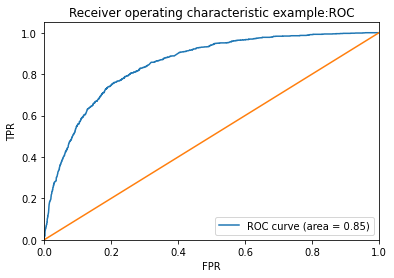

In [118]:
# plotting roc curve 
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)

# Step 10 : Finding the optimal cutoff point

In [119]:
numbers = [float(x/10) for x in range(10)]
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [120]:
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.churn_prob.map(lambda k : 1 if k>i else 0)
y_train_pred_final

,churn,churn_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
877,0,0.039915,0,1,0,0,0,0,0,0,0,0,0
5792,1,0.457305,0,1,1,1,1,1,0,0,0,0,0
5334,1,0.077237,0,1,0,0,0,0,0,0,0,0,0
878,0,0.031131,0,1,0,0,0,0,0,0,0,0,0
6578,0,0.090056,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,0.033370,0,1,0,0,0,0,0,0,0,0,0
3927,1,0.196345,0,1,1,0,0,0,0,0,0,0,0
5955,0,0.009318,0,1,0,0,0,0,0,0,0,0,0
6936,1,0.660302,1,1,1,1,1,1,1,1,0,0,0


- x>i means seeing churn prob column and then when threshold is i= 0.0 then churn prob column we will compare.so o.282193 is > 0.0 then we will say 1.
- x>i now threshold is o.1 ,so we will see churn prob column if >0.1 write 1 else 0.
- x> i here thrshold is 0.2, if churn prob column values > 0.2 then 1 else 0.
- and so on

In [122]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy' ,'sensitivity' , 'specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    confusion1 = metrics.confusion_matrix(y_train_pred_final.churn , y_train_pred_final[i])
    total = sum(sum(confusion1))   
    
    accuracy = (confusion1[0,0]+confusion1[1,1])/total        
                                                      
        
    sensitivity = (confusion1[1,1])/(confusion1[1,0]+confusion1[1,1])  
    specificity = (confusion1[0,0])/(confusion1[0,0]+confusion1[0,1])  
    cutoff_df.loc[i] = [i,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.264300     1.000000     0.000000
0.1   0.1  0.615619     0.941673     0.498484
0.2   0.2  0.721095     0.858020     0.671905
0.3   0.3  0.772414     0.769762     0.773366
0.4   0.4  0.796552     0.670760     0.841742
0.5   0.5  0.808519     0.558711     0.898263
0.6   0.6  0.798986     0.399847     0.942377
0.7   0.7  0.777890     0.222563     0.977392
0.8   0.8  0.740365     0.023791     0.997794
0.9   0.9  0.735700     0.000000     1.000000


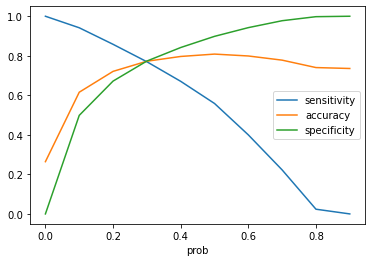

In [123]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x = 'prob' ,y=['sensitivity','accuracy','specificity'])
plt.show()

- From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [124]:
# predicting using 0.3 as threshold point
y_train_pred_final['final_Predicted'] = y_train_pred_final.churn_prob.map(lambda k : 1 if k>0.3 else 0)
y_train_pred_final

,churn,churn_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
877,0,0.039915,0,1,0,0,0,0,0,0,0,0,0,0
5792,1,0.457305,0,1,1,1,1,1,0,0,0,0,0,1
5334,1,0.077237,0,1,0,0,0,0,0,0,0,0,0,0
878,0,0.031131,0,1,0,0,0,0,0,0,0,0,0,0
6578,0,0.090056,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,0.033370,0,1,0,0,0,0,0,0,0,0,0,0
3927,1,0.196345,0,1,1,0,0,0,0,0,0,0,0,0
5955,0,0.009318,0,1,0,0,0,0,0,0,0,0,0,0
6936,1,0.660302,1,1,1,1,1,1,1,1,0,0,0,1


In [125]:
# Let's check the accuracy 
metrics.accuracy_score(y_train_pred_final.churn ,y_train_pred_final.final_Predicted)

0.7724137931034483

In [126]:
# let's calculate confusion matrix for new threshold value 0.3
confusion_2 = metrics.confusion_matrix(y_train_pred_final.churn , y_train_pred_final.final_Predicted)
confusion_2

array([[2805,  822],
       [ 300, 1003]])

In [127]:
TP = confusion_2[1,1]
TN = confusion_2[0,0]
FP = confusion_2[0,1]
FN = confusion_2[1,0]

###### sensitivity 

In [128]:
# let's calculate sensitivity
TP/(TP+FN) 

0.7697620874904068

- SENSITIVITY : 77% CUSTOMERS ARE ACTUALLY CHURNED 
###### Specificity

In [129]:
# LET'S SEE SPECIFICITY
TN/(TN+FP)

0.7733664185277088

- SPECIFICITY INSIGHT : 77% CUSTOMERS ACTUALLY NOT CHURNED
###### False +ve rate

In [130]:
# LET'S CALCULATE FALSE POSITIVE RATE :

FP/(TN+FP)

0.22663358147229115

###### +ve predictive value /Precision

In [131]:
# POSITIVE PREDICTIVE VALUE / PRECISION
TP/(TP+FP)

0.5495890410958905

In [132]:
# NEGATIVE PREDICTIVE VALUE 
TN/(TN+FN)

0.9033816425120773

# Precision and recall
- In industry, some businesses follow the 'Sensitivity-Specificity' view and some other businesses follow the 'Precision-Recall' view.
- We can use any one view of this 2 views
-----
- When using the sensitivity-specificity tradeoff, we found out that the optimal cutoff point was 0.3.Now, when we will plot the precision-recall tradeoff, we will get diff threshold. 

In [133]:
# import precision and recall from sklearn metrics
from sklearn.metrics import precision_score ,recall_score

In [1798]:
# finding precision score
precision_score(y_train_pred_final.churn , y_train_pred_final.Predicted)

0.6483516483516484

In [134]:
# finding recall score
recall_score(y_train_pred_final.churn , y_train_pred_final.Predicted)

0.5587106676899463

### Trade off between Precision & Recall

In [135]:

from sklearn.metrics import precision_recall_curve

In [136]:

y_train_pred_final.churn , y_train_pred_final.Predicted

(877     0
 5792    1
 5334    1
 878     0
 6578    0
        ..
 79      0
 3927    1
 5955    0
 6936    1
 5640    1
 Name: churn, Length: 4930, dtype: int64,
 877     0
 5792    0
 5334    0
 878     0
 6578    0
        ..
 79      0
 3927    0
 5955    0
 6936    1
 5640    1
 Name: Predicted, Length: 4930, dtype: int64)

In [137]:

p,r,thresholds = precision_recall_curve(y_train_pred_final.churn , y_train_pred_final.churn_prob)


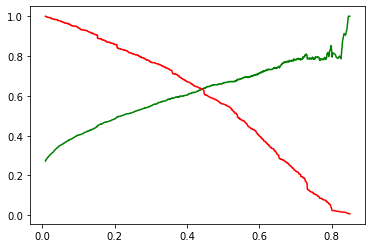

In [138]:
# let's plot a graph.Precision - recall trade off curve.
plt.plot(thresholds , p[ : -1],'g')  
plt.plot(thresholds ,r[ : -1],'r')
plt.show()

- Precision & recall are intersecting at 0.42.So our Threshold is 0.42. 
- F1 score:
    - F=2×precision*recall/(precision + recall)
    - The F1-score is useful when you want to look at the performance of precision and recall together.



In [139]:
F1 =  2*((0.64*0.54)/(0.64+0.54))
F1

0.5857627118644068

## step 11 : Making predictions on test data sets

In [140]:
X_test  

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
4880,0,1,0,50,1,0,20.55,1067.65,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0
1541,0,0,0,72,1,0,19.85,1434.10,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1289,0,0,0,63,1,0,68.80,4111.35,1,0,0,1,0,0,0,0,1,1,1,1,1,0,0
5745,0,1,1,61,1,1,24.20,1445.20,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0
4873,0,0,0,7,1,0,19.30,144.95,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,1,1,0,7,1,1,89.50,676.70,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1
5092,0,1,1,7,1,0,20.45,150.75,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
5837,0,0,0,2,0,0,51.40,96.80,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3597,0,1,0,25,1,1,95.70,2338.35,1,1,0,0,0,1,0,0,0,0,0,0,1,1,1


In [141]:
# Scaling
# we will transform on test data. We won't do fit on test data.
X_test[['tenure' , 'MonthlyCharges' ,'TotalCharges']] = scaler.transform(X_test[['tenure' , 'MonthlyCharges' ,'TotalCharges']])      



In [142]:
# let's see the top 15 features which we got using rfe
col

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'TechSupport_Yes', 'StreamingTV_Yes'],
      dtype='object')

In [143]:
# We did all this in train data ,so we will access them directly in test data
X_test = X_test[col]
X_test.head()

,SeniorCitizen,tenure,PaperlessBilling,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes
4880,0,0.713723,0,0,1,0,1,0,0,0,0,0
1541,0,1.609107,0,0,1,0,1,0,0,0,0,0
1289,0,1.242814,0,0,0,1,0,0,1,1,1,0
5745,0,1.161415,1,0,1,0,1,0,0,0,0,0
4873,0,-1.036345,0,0,1,0,0,0,0,0,0,0


In [144]:
# add constant to X test data set
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,SeniorCitizen,tenure,PaperlessBilling,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes
4880,1.0,0,0.713723,0,0,1,0,1,0,0,0,0,0
1541,1.0,0,1.609107,0,0,1,0,1,0,0,0,0,0
1289,1.0,0,1.242814,0,0,0,1,0,0,1,1,1,0
5745,1.0,0,1.161415,1,0,1,0,1,0,0,0,0,0
4873,1.0,0,-1.036345,0,0,1,0,0,0,0,0,0,0


In [146]:
# predicting y test 
y_test_pred = logm5.predict(X_test_sm)

In [147]:
# create a dataframe of actual y test & predicted ytest
y_test_pred_final = pd.DataFrame({'churn' : y_test ,'churn_prob' : y_test_pred})
y_test_pred_final.head()

,churn,churn_prob
4880,0,0.010770
1541,0,0.005608
1289,0,0.016005
5745,0,0.011188
4873,0,0.130534


In [148]:
# let's add custid to our dataframe
y_test_pred_final['Custid'] = y_test.index
y_test_pred_final.head()

,churn,churn_prob,Custid
4880,0,0.010770,4880
1541,0,0.005608,1541
1289,0,0.016005,1289
5745,0,0.011188,5745
4873,0,0.130534,4873


In [149]:
 # Creating new column 'predicted' with 1 if Churn_Prob > 0.42 else 0
y_test_pred_final['Predicted'] = y_test_pred_final.churn_prob.map(lambda x : 1 if x > 0.42 else 0)
y_test_pred_final.head()

,churn,churn_prob,Custid,Predicted
4880,0,0.010770,4880,0
1541,0,0.005608,1541,0
1289,0,0.016005,1289,0
5745,0,0.011188,5745,0
4873,0,0.130534,4873,0


In [150]:
# now let's see the accuracy score
metrics.accuracy_score(y_test_pred_final.churn , y_test_pred_final.Predicted)

0.7823000473260767

In [151]:
# let's see confusion matrix
metrics.confusion_matrix(y_test_pred_final.churn , y_test_pred_final.Predicted)


array([[1287,  260],
       [ 200,  366]])

In [152]:
# we can see sensitivity and specificity of test data
#SENSITIVITY
sensi = TP/(TP+FN)
sensi

0.7697620874904068

In [153]:
# Specificity
spe = TN/(TN+FP)
spe

0.7733664185277088

- sensitivity and specificity of test data set is 76.9% & 77% at 0.42 cutoff, we can say our model is good.
- It looks like we have created a descent model for the churn dataset as the metrics are decent for both the training and test datasets.
 